In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\\Windows\\Fonts\\HYBDAL.TTF").get_name()   #윈도우
rc('font', family=font_name) 			

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False


In [45]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
data  = diabetes.data
target = diabetes.target
# pandas를 사용하고 싶은 경우 아래 코드를 이용
#df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
#df["target"] = diabetes.target
feature_names = diabetes.feature_names
print(data.shape ,target.shape)
print(feature_names)
print(data[:5]) 
print(target[:5])

(442, 10) (442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


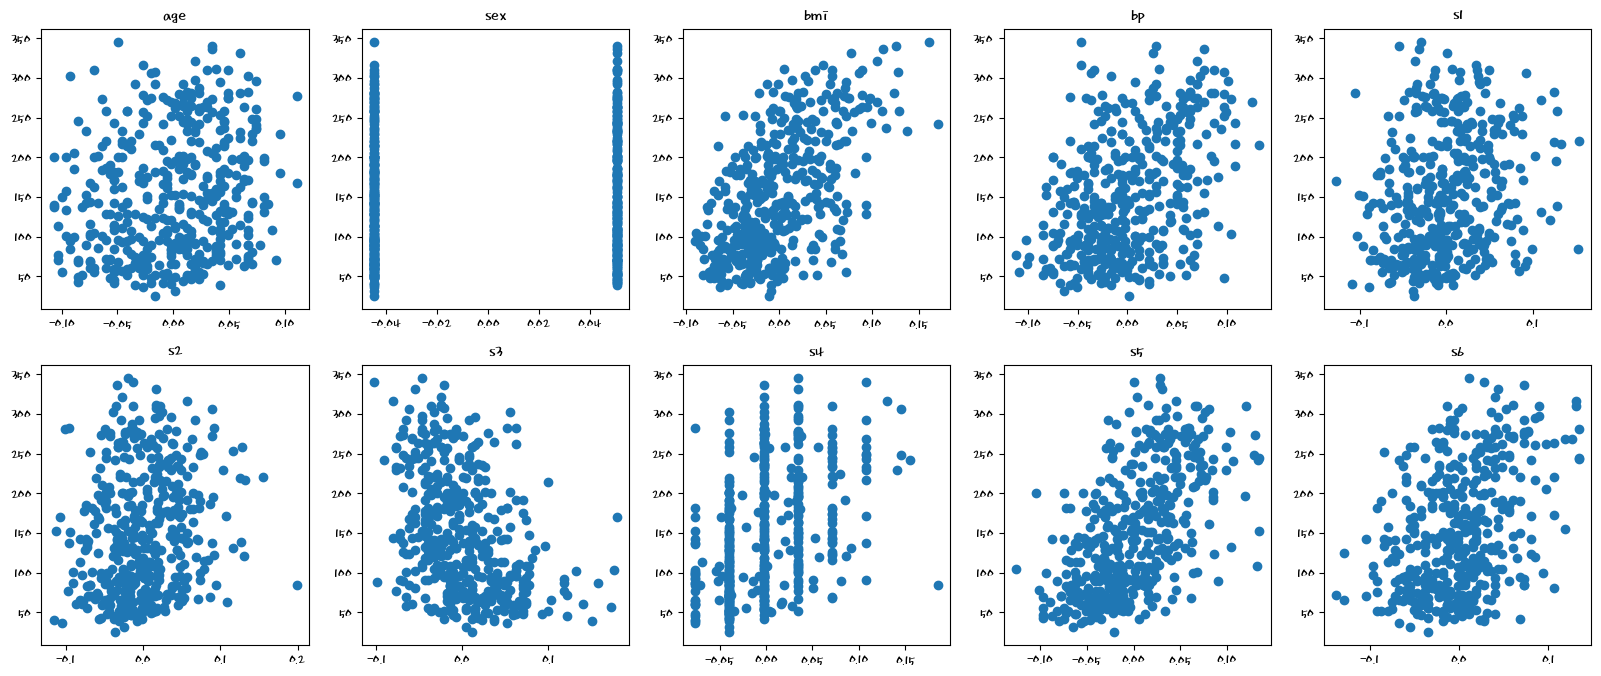

In [4]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\\Windows\\Fonts\\HYBDAL.TTF").get_name()
rc('font', family=font_name) 	

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
y = target

for i, ax in enumerate(axes.ravel()):
    x = data[:,i] 
    ax.set_title(feature_names[i]) 
    ax.scatter(x, y)
plt.show()


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=2024) 
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train[:,[8]], Y_train) 
print('coef_', lr.coef_)
print('intercept_', lr.intercept_)

coef_ [883.79846797]
intercept_ 153.54634501060275


In [51]:
print('R2 score for train set: {}'.format(lr.score(X_train[:,[8]], Y_train)))
# test set에 대한 예측
print('R2 score for test set: {}'.format(lr.score(X_test[:,[8]], Y_test)))

R2 score for train set: 0.30572147870696353
R2 score for test set: 0.37051066915025876


In [53]:
lr = LinearRegression().fit(X_train, Y_train)

print('coef_', lr.coef_) #사용된 모든 독립변수에 대한 계수(기울기)를 반환
print('intercept_', lr.intercept_)

coef_ [ -10.96023563 -236.92984785  511.8289415   369.85561743 -826.70881193
  483.38933606   97.45784245  135.10722892  745.51961547   58.43264756]
intercept_ 153.80722393185206


In [55]:
print('R2 score for train set: {}'.format(lr.score(X_train, Y_train)))
print('R2 score for test set: {}'.format(lr.score(X_test, Y_test)))

R2 score for train set: 0.5234443748947238
R2 score for test set: 0.4853754728956027


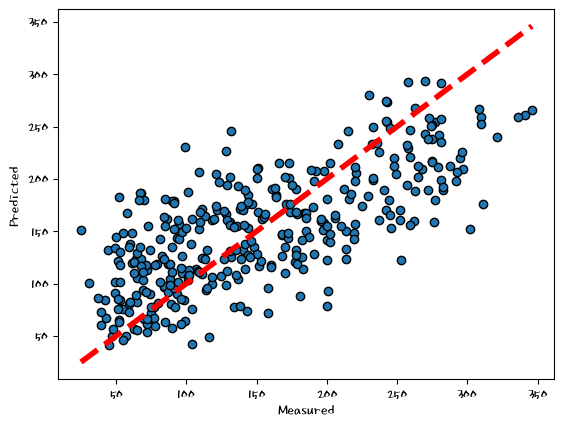

In [57]:
predicted = lr.predict(X_train)

fig, ax = plt.subplots()
ax.scatter(Y_train, predicted, edgecolors=(0, 0, 0)) 
ax.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', lw=4) 
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [19]:
X_train2=X_train**2
X_train_poly = np.hstack((X_train, X_train2))
print('X_train vs X_train_poly:',X_train.shape, X_train_poly.shape)

X_train vs X_train_poly: (353, 10) (353, 20)


In [21]:
X_train_poly = X_train_poly
print(X_train_poly.shape, Y_train.shape)

(353, 20) (353,)


In [23]:
lr = LinearRegression().fit(X_train_poly, Y_train)

In [25]:
X_test_poly = np.hstack((X_test, X_test**2))

In [27]:
print('R2 score for train set: {:.3f}'.format(lr.score(X_train_poly, Y_train)))
# test set에 대한 예측
print('R2 score for test set: {:.3f}'.format(lr.score(X_test_poly, Y_test)))

R2 score for train set: 0.549
R2 score for test set: 0.520


In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.005).fit(X_train_poly, Y_train)
print('Ridge R2 score for polynomial train set: {:.3f}'.format(ridge.score(X_train_poly, Y_train)))
print('Ridge R2 score for polynomial test set: {:.3f}'.format(ridge.score(X_test_poly, Y_test)))

Ridge R2 score for polynomial train set: 0.535
Ridge R2 score for polynomial test set: 0.496


In [59]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso(alpha=0.005).fit(X_train_poly, Y_train)
print('Lasso R2 score for polynomial train set: {:.3f}'.format(lasso.score(X_train_poly, Y_train)))
print('Lasso R2 score for polynomial test set: {:.3f}'.format(lasso.score(X_test_poly, Y_test)))
print('Used features count: {}'.format(np.sum(lasso.coef_ != 0))) #계수가 0이 아닌 독립변수의 수를 출력

Lasso R2 score for polynomial train set: 0.540
Lasso R2 score for polynomial test set: 0.505
Used features count: 14
